In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load Backtest Input Data
df = pd.read_csv("C:/Users/ashua/Desktop/Stock Market Recommendation System/data/backtest_input.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

df.head()


,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,SMA_20,...,Volatility,RSI_14,MACD,MACD_Signal,BB_Upper,BB_Lower,BB_Width,Future_Return,Signal,Predicted_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-12 00:00:00-05:00,1956,184.319323,184.992969,183.457467,184.180634,40477800,0.0,0.0,0.001778,188.485455,...,0.010902,29.475307,-1.586924,-0.827141,199.530015,177.440894,22.089120,-0.012317,0,1
2024-01-16 00:00:00-05:00,1957,180.455785,182.536129,179.237281,181.912033,65603000,0.0,0.0,-0.012317,187.768229,...,0.011051,27.893665,-1.731705,-1.008054,198.547817,176.988641,21.559176,-0.005173,0,1
2024-01-17 00:00:00-05:00,1958,179.574135,181.218593,178.613208,180.970932,47317400,0.0,0.0,-0.005173,187.030695,...,0.011053,27.407506,-1.900476,-1.186538,197.533982,176.527408,21.006574,0.032571,1,1
2024-01-18 00:00:00-05:00,1959,184.349035,187.370503,184.091472,186.865280,78005800,0.0,0.0,0.032571,186.671092,...,0.013653,42.152876,-1.540842,-1.257399,196.640339,176.701845,19.938494,0.015533,1,0
2024-01-19 00:00:00-05:00,1960,187.558705,190.154188,187.053482,189.767838,68903000,0.0,0.0,0.015533,186.404610,...,0.014115,46.773151,-1.009975,-1.207914,195.686719,177.122501,18.564218,0.012163,1,1


In [ ]:
#Sanity Check
print(df.shape)
print(df["Predicted_Signal"].value_counts())


(489, 21)
Predicted_Signal
1    285
0    204
Name: count, dtype: int64


In [ ]:
#Compute Daily Returns
df["Market_Return"] = df["Close"].pct_change()


In [ ]:
#Strategy Returns (Buy/Hold Logic)
df["Strategy_Return"] = df["Market_Return"] * df["Predicted_Signal"]
df.dropna(inplace=True)


In [7]:
#Cumulative Returns
df["Cumulative_Market_Return"] = (1 + df["Market_Return"]).cumprod()
df["Cumulative_Strategy_Return"] = (1 + df["Strategy_Return"]).cumprod()


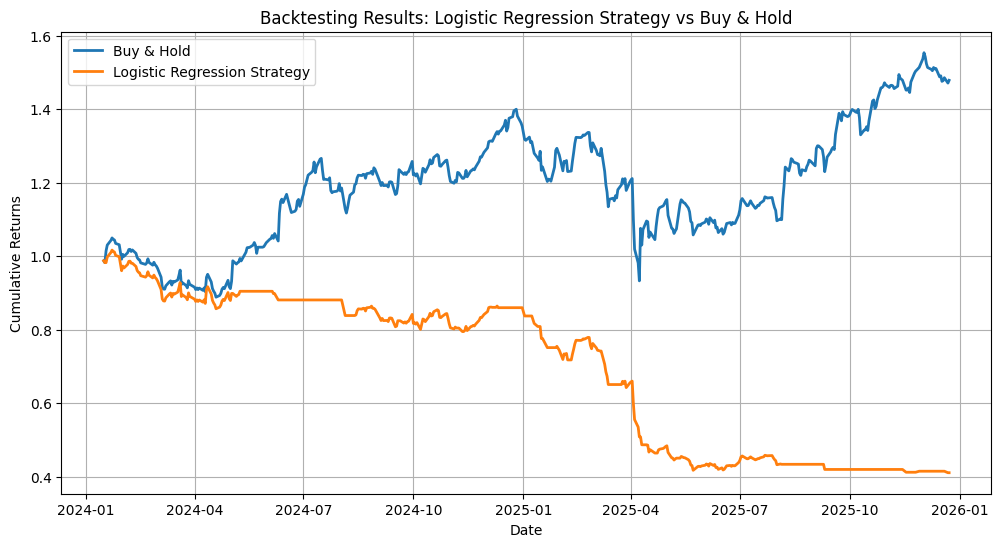

In [8]:
#Equity Curve Plot (CORE RESULT)
plt.figure(figsize=(12, 6))

plt.plot(df.index, df["Cumulative_Market_Return"], label="Buy & Hold", linewidth=2)
plt.plot(df.index, df["Cumulative_Strategy_Return"], label="Logistic Regression Strategy", linewidth=2)

plt.title("Backtesting Results: Logistic Regression Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)

plt.show()


In [10]:
#Performance Metrics

# Total Returns
total_market_return = df["Cumulative_Market_Return"].iloc[-1] - 1
total_strategy_return = df["Cumulative_Strategy_Return"].iloc[-1] - 1

#Sharpe Ratio
sharpe_ratio = (
    df["Strategy_Return"].mean() /
    df["Strategy_Return"].std()
) * np.sqrt(252)

#Maximum Drawdown
rolling_max = df["Cumulative_Strategy_Return"].cummax()
drawdown = df["Cumulative_Strategy_Return"] / rolling_max - 1
max_drawdown = drawdown.min()


In [11]:
print("===== BACKTESTING RESULTS (LOGISTIC REGRESSION) =====")
print(f"Total Market Return:   {total_market_return:.2%}")
print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Sharpe Ratio:          {sharpe_ratio:.2f}")
print(f"Maximum Drawdown:      {max_drawdown:.2%}")

===== BACKTESTING RESULTS (LOGISTIC REGRESSION) =====
Total Market Return:   47.88%
Total Strategy Return: -58.92%
Sharpe Ratio:          -2.28
Maximum Drawdown:      -59.60%
